In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('dataset\\pizza_sales_updated.csv')

# Top-10 Meistverkaufte Pizza (pizza_name)

The Classic Deluxe Pizza


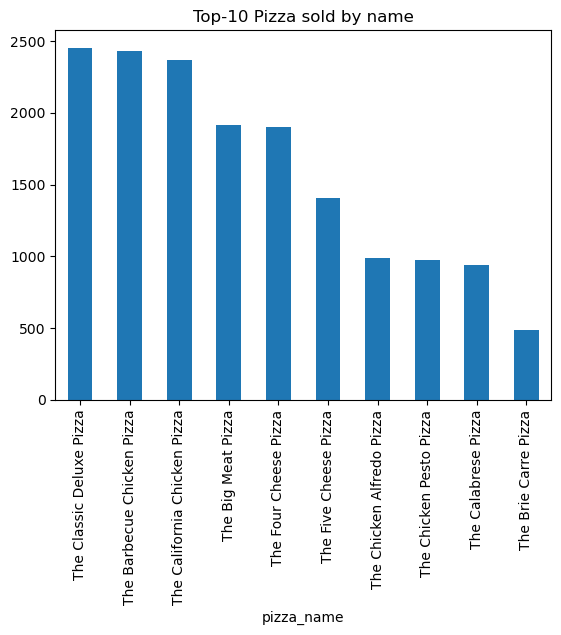

In [19]:
# Top-10 Pizzen nach Anzahl verkaufter Stücke
pizza_name = data.groupby("pizza_name")["quantity"].sum()
top10_pizza = pizza_name.head(10).sort_values(ascending=False)

# Meistverkaufteste Pizza
meistverkaufte_pizza = pizza_name.idxmax()
print(meistverkaufte_pizza)

top10_pizza.plot(kind='bar', title='Top-10 Pizza sold by name' )
plt.show()


# Pizzen mit Sizeverteilung

<Axes: title={'center': 'Top-10 Pizza sold by size'}, xlabel='pizza_name'>

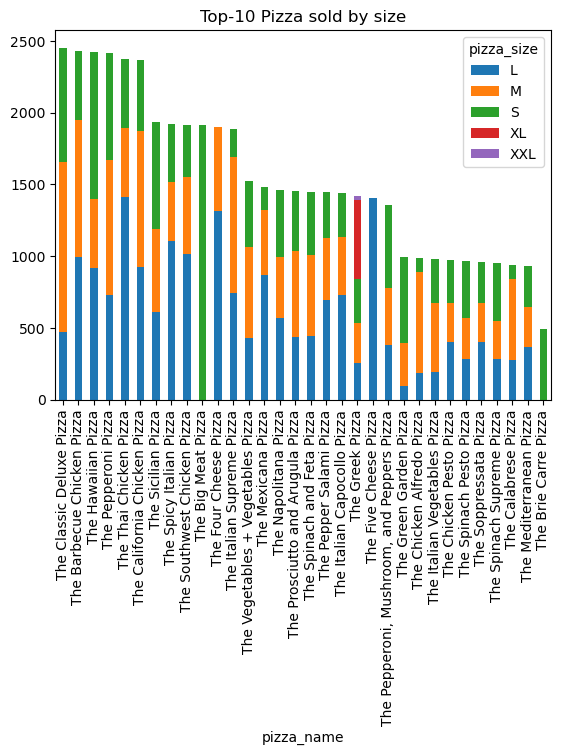

In [20]:
pizza_total_quantity = data.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).index # Für Top-10 -> :10
pizza_size_count = data.groupby(['pizza_name', 'pizza_size']).sum()['quantity'].unstack(fill_value=0)
pizza_size_count.loc[pizza_total_quantity].plot(kind='bar', stacked=True, title='Top-10 Pizza sold by size')


# Welche Pizzagrößen werden wie oft gekauft?
Die Leute in Amerika lieben Large

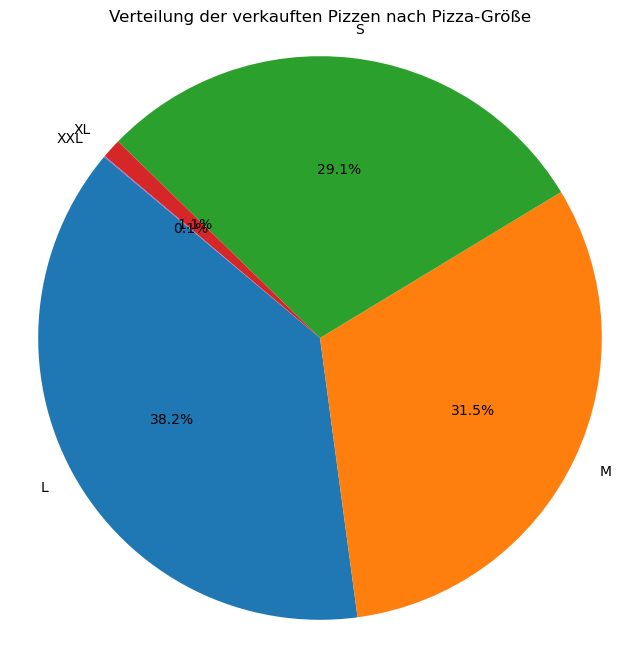

In [21]:
# Anzahl der verkauften Pizzen für jede Pizza-Größe berechnen
pizza_sales = data.groupby('pizza_size')['quantity'].sum()

# Plot erstellen
plt.figure(figsize=(8, 8))
plt.pie(pizza_sales, labels=pizza_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der verkauften Pizzen nach Pizza-Größe')

# Plot anzeigen
plt.axis('equal')
plt.show()

# Top-10 pizzen nach Größe

pizza_name
The Classic Deluxe Pizza        2453.0
The Barbecue Chicken Pizza      2432.0
The Hawaiian Pizza              2422.0
The Pepperoni Pizza             2418.0
The Thai Chicken Pizza          2371.0
The California Chicken Pizza    2370.0
The Sicilian Pizza              1938.0
The Spicy Italian Pizza         1924.0
The Southwest Chicken Pizza     1917.0
The Big Meat Pizza              1914.0
Name: quantity, dtype: float64


<Axes: title={'center': 'Top-10 Pizza sold by size'}, xlabel='pizza_name'>

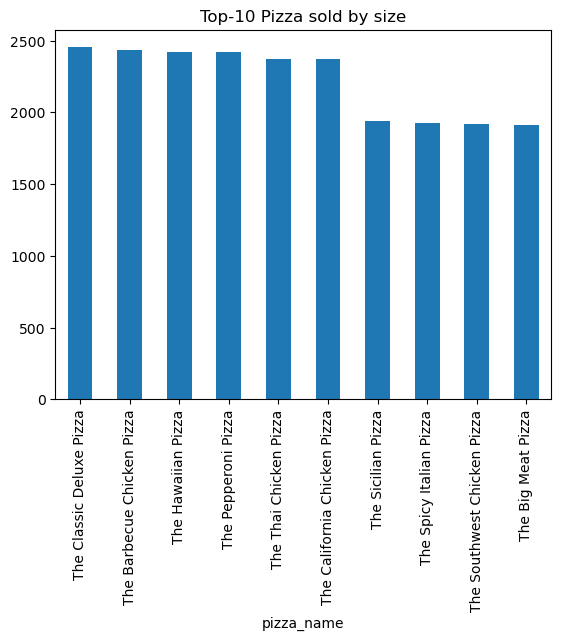

In [22]:
pizza_by_size = data.groupby(['pizza_name', 'pizza_size']).sum()['quantity']
top_10_pizza_size = pizza_by_size.groupby('pizza_name').sum().nlargest(10)
print(top_10_pizza_size)
top_10_pizza_size.plot(kind='bar', stacked=True, title='Top-10 Pizza sold by size')

# Meist verkaufte Pizza an einem Tag

In [23]:
date = data.groupby(['order_date', 'pizza_name'])['quantity'].sum()
date_max = date.idxmax()
print(date_max)

('2015-11-26', 'The Hawaiian Pizza')


# Top-10 Umsatzstärkste Pizzen
Wie viel Geld geben die Leute für welche Pizza aus?
Antwort: The Thai Chicken Pizza. Lohnt sich wohl mehr für den Preis


pizza_name                    total_price
The Thai Chicken Pizza        20.75          27410.75
The Five Cheese Pizza         18.50          24235.00
The Spicy Italian Pizza       20.75          22161.00
The Four Cheese Pizza         17.95          22078.50
The Big Meat Pizza            12.00          20592.00
The Southwest Chicken Pizza   20.75          20127.50
The Barbecue Chicken Pizza    20.75          19567.25
The Classic Deluxe Pizza      16.00          18224.00
The California Chicken Pizza  20.75          17948.75
The Mexicana Pizza            20.25          16625.25
Name: total_price, dtype: float64


<Axes: title={'center': 'Top-10 Umsatz pro Pizza'}, xlabel='pizza_name,total_price'>

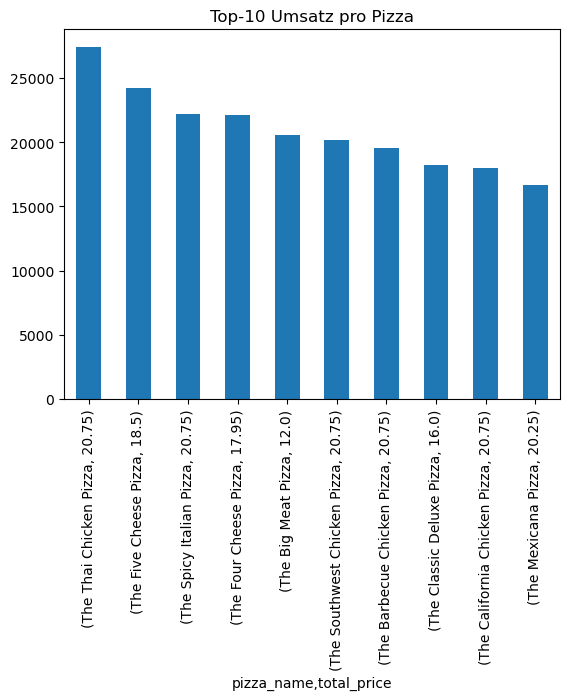

In [24]:
total_price = data.groupby(['pizza_name', 'total_price'])['total_price'].sum()
top_10_total_price = total_price.sort_values(ascending=False).head(10)
print(top_10_total_price)
top_10_total_price.plot(kind='bar', title='Top-10 Umsatz pro Pizza')

# Hat der Preis der Pizzen einen Einfluss auf den Kauf?
The Big Meat Pizza ist wahrscheinlich die Preis-Leistungs Kanone

pizza_name                   unit_price
The Big Meat Pizza           12.00         1914.0
The Thai Chicken Pizza       20.75         1410.0
The Five Cheese Pizza        18.50         1409.0
The Four Cheese Pizza        17.95         1316.0
The Classic Deluxe Pizza     16.00         1181.0
The Spicy Italian Pizza      20.75         1109.0
The Hawaiian Pizza           10.50         1020.0
The Southwest Chicken Pizza  20.75         1016.0
The Barbecue Chicken Pizza   20.75          992.0
                             16.75          956.0
Name: quantity, dtype: float64


<Axes: title={'center': 'Top-10 Verkauf nach Preis pro Pizza'}, xlabel='pizza_name,unit_price'>

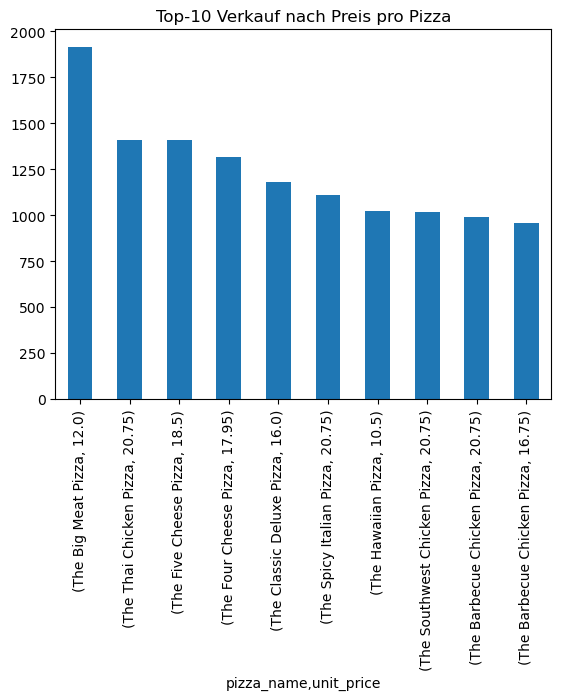

In [25]:
unit_price = data.groupby(['pizza_name', 'unit_price'])['quantity'].sum()
top_10_unit_price = unit_price.sort_values(ascending=False).head(10)
print(top_10_unit_price)
top_10_unit_price.plot(kind='bar', title='Top-10 Verkauf nach Preis pro Pizza')

# Welche Uhrzeit ist die Verkaufsstärkste

<Axes: title={'center': 'Best sales time'}, xlabel='order_time'>

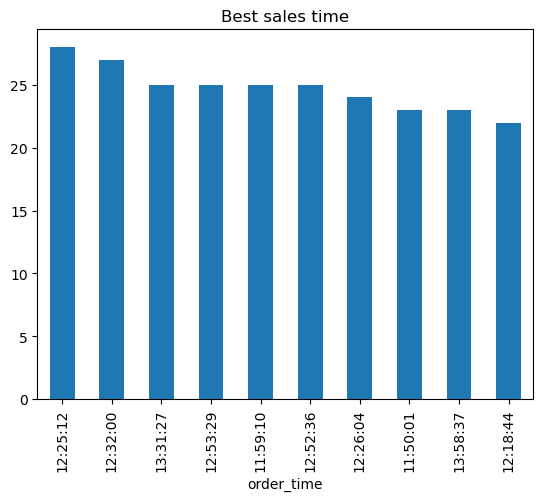

In [26]:
best_sales_time = data.groupby('order_time')['quantity'].sum()
# 10 best sales time
top10_sales_time = best_sales_time.sort_values(ascending=False).head(10)
#print(top10_sales_time)
top10_sales_time.plot(kind='bar', title='Best sales time')

# Top-10: Welcher Tag ist am Verkaufsstärksten
evtl. Feiertage...
1. Thanksgiving, 2. - , 3. Independence Day ...

<Axes: title={'center': 'Top-10 sales date'}, xlabel='order_date'>

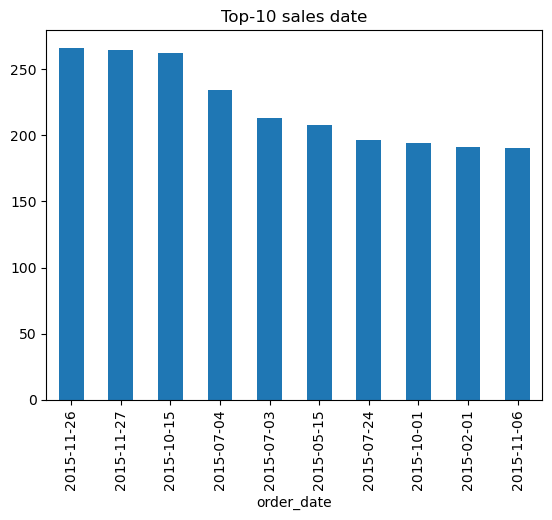

In [27]:
best_sales_date = data.groupby('order_date')['quantity'].sum()
best_sales_date.plot(kind='bar', title='Best sales date')
top10_sales_date = best_sales_date.sort_values(ascending=False).head(10)
top10_sales_date.plot(kind='bar', title='Top-10 sales date')

# Gesamtverkäufe im Laufe der Zeit

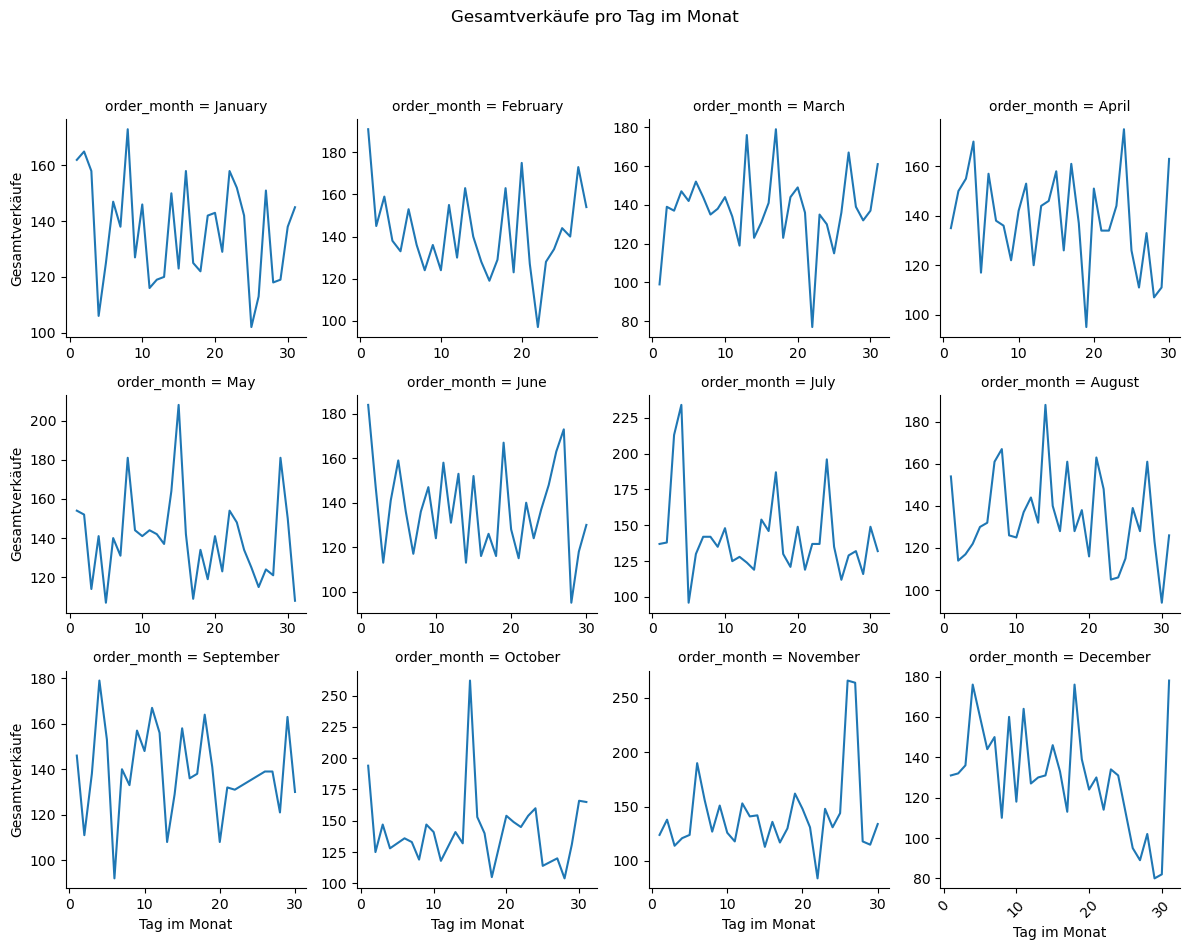

In [28]:
# 'order_date' in Datetime-Objekte umwandeln
data['order_date'] = pd.to_datetime(data['order_date'])

# Gesamtverkäufe pro Tag berechnen
total_sales_per_day = data.groupby('order_date')['quantity'].sum().reset_index(name='total_sales')

# 'order_month' und 'day_in_month' Spalten hinzufügen
total_sales_per_day['order_month'] = total_sales_per_day['order_date'].dt.month_name()
total_sales_per_day['day_in_month'] = total_sales_per_day['order_date'].dt.day

# Plot erstellen
g = sns.relplot(
    data=total_sales_per_day, 
    x="day_in_month", y="total_sales",
    kind="line", col="order_month",
    col_wrap=4, height=3,
    facet_kws={'sharey': False, 'sharex': False}
)

# Achsenbeschriftungen und Titel hinzufügen
g.set_axis_labels("Tag im Monat", "Gesamtverkäufe")
g.fig.suptitle('Gesamtverkäufe pro Tag im Monat', y=1.05)

# X-Achsenlabels drehen, um Platz zu sparen
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Gesamtumsatz in für jeden Monat

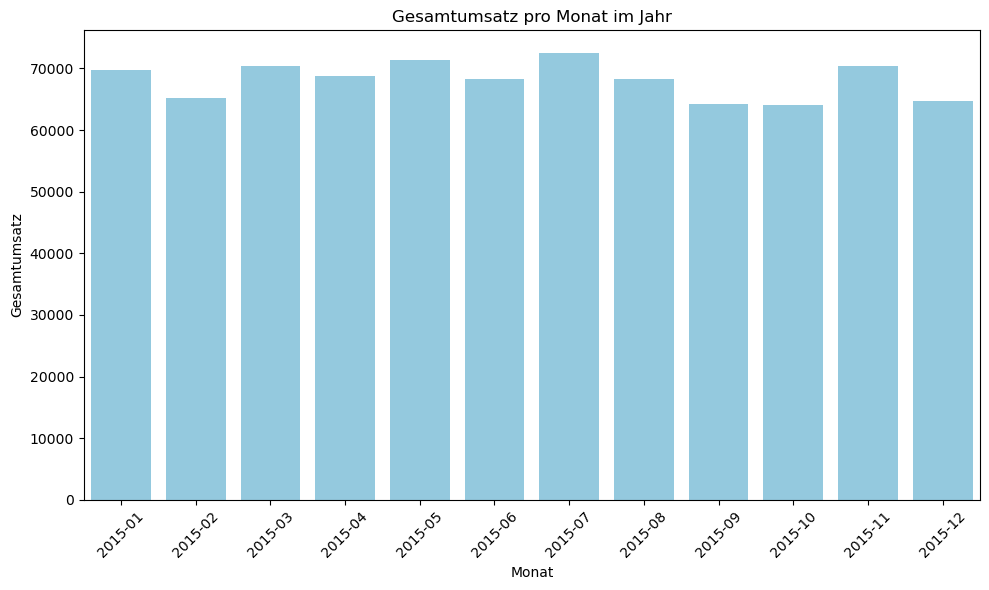

In [29]:
# Gesamtumsatz pro Monat berechnen
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_month'] = data['order_date'].dt.to_period('M')
total_revenue_per_month = data.groupby('order_month')['total_price'].sum().reset_index(name='total_revenue')

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.barplot(data=total_revenue_per_month, x='order_month', y='total_revenue', color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Monat')
plt.ylabel('Gesamtumsatz')
plt.title('Gesamtumsatz pro Monat im Jahr')

# X-Achsenlabels drehen, um Platz zu sparen
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Wie häufig tritt die "Anzahl" der Bestellungen auf?
Verteilung der Bestellungen. Wurden 1 oder mehrere Pizzen gekauft? Wie häufig treten die  anzahl der Bestellungen auf

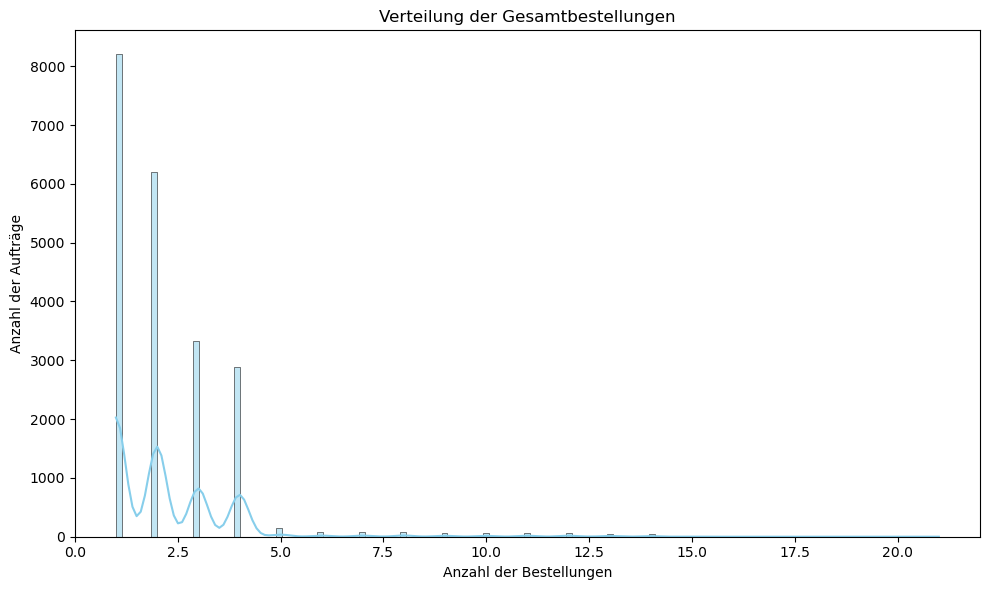

In [30]:
# Gesamtbestellungen pro order_id berechnen
total_orders = data['order_id'].value_counts().reset_index(name='total_orders')
total_orders.columns = ['order_id', 'total_orders']

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.histplot(total_orders['total_orders'], kde=True, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Anzahl der Bestellungen')
plt.ylabel('Anzahl der Aufträge')
plt.title('Verteilung der Gesamtbestellungen')

# Plot anzeigen
plt.tight_layout()
plt.show()

# Anzahl der Artikel der Bestellungen

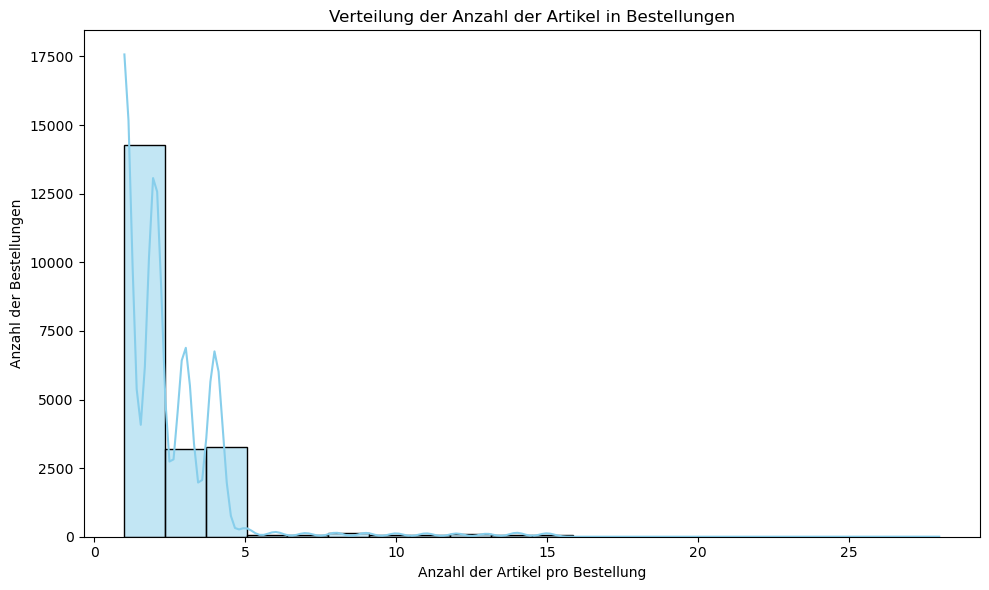

In [31]:
# Gesamtbestellungen pro order_id berechnen
total_orders = data['order_id'].value_counts().reset_index(name='total_orders')
total_orders.columns = ['order_id', 'total_orders']

# Anzahl der Artikel pro Bestellung berechnen
items_per_order = data.groupby('order_id')['quantity'].sum().reset_index(name='total_items')

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.histplot(items_per_order['total_items'], bins=20, kde=True, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Anzahl der Artikel pro Bestellung')
plt.ylabel('Anzahl der Bestellungen')
plt.title('Verteilung der Anzahl der Artikel in Bestellungen')

# Plot anzeigen
plt.tight_layout()
plt.show()

# Wann muss ich meine Pizza bestellen um die kürzeste Wartezeit zu haben?

# Welche Belege für die Pizzen müssen im schnitt nach welcher Zeit wieder gekauft werden?
Gekauft wird angenommen werden 200 pro Belag

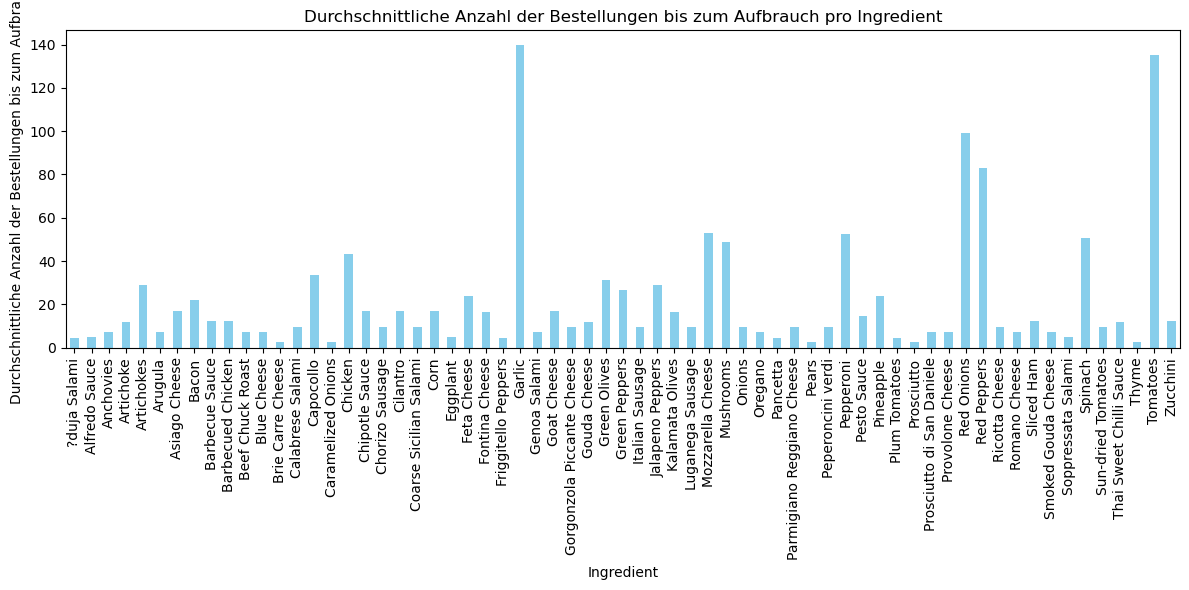

In [32]:
# Annahme: 200 Stück pro Belag von der Pizzafirma gekauft
units_per_topping = 200

# Neue Spalte 'ingredient' erstellen, indem die Zutaten aufgeteilt werden
data['ingredients_list'] = data['pizza_ingredients'].str.split(', ')

# Explodieren der Liste von Zutaten, um jeden Belag zu einem einzelnen Eintrag zu machen
data_exploded = data.explode('ingredients_list')

# Gesamtanzahl der Verkäufe für jedes Ingredient zählen
total_sales_per_ingredient = data_exploded.groupby('ingredients_list')['quantity'].sum()

# Anzahl der Einheiten (Pizzen) für jedes Ingredient berechnen
total_units_per_ingredient = total_sales_per_ingredient / units_per_topping

# Plot erstellen
plt.figure(figsize=(12, 6))
total_units_per_ingredient.plot(kind='bar', color='skyblue')
plt.xlabel('Ingredient')
plt.ylabel('Durchschnittliche Anzahl der Bestellungen bis zum Aufbrauch')
plt.title('Durchschnittliche Anzahl der Bestellungen bis zum Aufbrauch pro Ingredient')
plt.xticks(rotation=90)
plt.tight_layout()

# Plot anzeigen
plt.show()

# Dual Line Plot Gesamtumsatz und Gesamtverkäufe

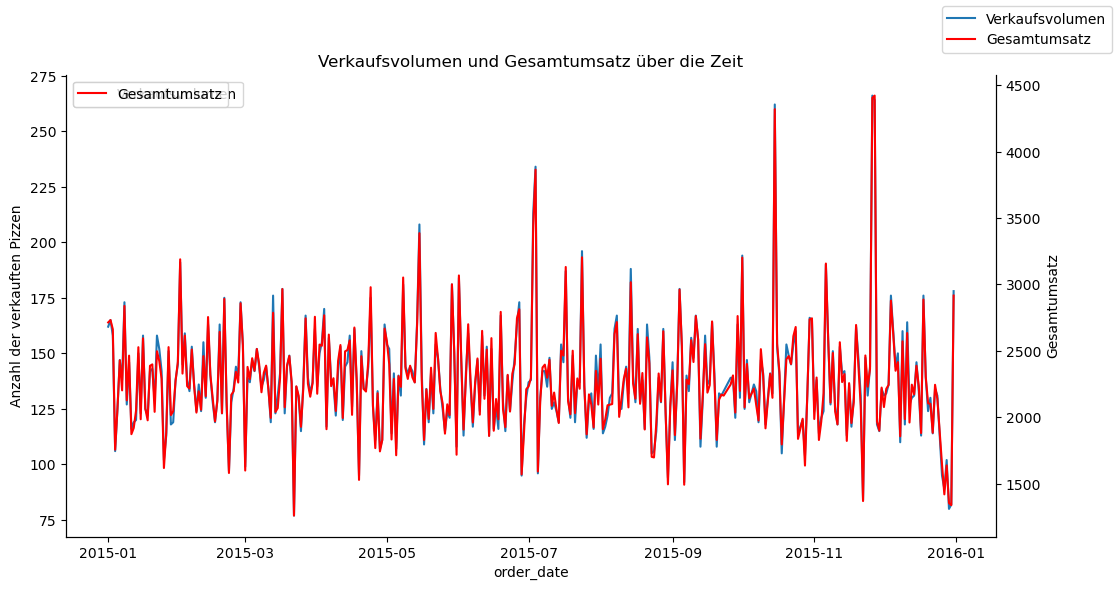

In [37]:
# Konvertieren der 'order_date' in ein DateTime-Objekt
data['order_date'] = pd.to_datetime(data['order_date'])

# Gruppierung nach Datum und Berechnung des Verkaufsvolumens (Anzahl der verkauften Pizzen) und des Gesamtumsatzes
daily_sales = data.groupby('order_date').agg({'quantity': 'sum', 'total_price': 'sum'}).reset_index()

# Figure und Axes erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Erste Linie für das Verkaufsvolumen
sns.lineplot(x='order_date', y='quantity', data=daily_sales, ax=ax, label='Verkaufsvolumen')

# Zweite Linie für den Gesamtumsatz
ax2 = ax.twinx()  # Zweite y-Achse für den Gesamtumsatz
sns.lineplot(x='order_date', y='total_price', data=daily_sales, ax=ax2, color='r', label='Gesamtumsatz')

# Legende anzeigen
ax.figure.legend()

# Achsenbeschriftungen und Titel
ax.set_ylabel('Anzahl der verkauften Pizzen')
ax2.set_ylabel('Gesamtumsatz')
plt.title('Verkaufsvolumen und Gesamtumsatz über die Zeit')

# Anpassen der Layouts
sns.despine(right=False)

# Plot anzeigen
plt.show()